Probability Distributions to Represent Any Continuous Uncertainty

The metalog distributions are an innovative new family of continuous probability distributions that better meet many of today’s needs than conventional distributions from centuries past.  The metalogs can represent a much wider range of shapes than conventional distributions like the normal, lognormal, beta, or triangular. Being quantile-parameterized, metalogs automatically mold themselves to assessed or empirical data, eliminating any need for curve-fitting.  They offer a choice among unbounded, semi-bounded, and bounded forms and have simple, closed-form, easy-to-program equations – making them ideal for decision analysis, simulation, and instant representation of most any assessed or empirical probabilistic data.  

The metalog distributions constitute a new system of continuous univariate probability distributions
designed for flexibility, simplicity, and ease/speed of use in practice.

The metalog is a series expansion of the parameters of the
logistic quantile function.

“metalog” is short for “meta logistic”

Representing/summarizing data with a smooth distribution that adheres to the shape of the data



In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x-> Input parameters of any series. Simply set x equal to a list. 

![title](Y.png)

In [59]:
#Y-matrix
#Y-matrix for the 10-term metalog. 
#The first n columns of this matrix are used to calculate scaling constants (a1, … an) according to a = [YTY]-1YTz.


def y10_z(x,bound,lower_bound,upper_bound):
    #y10 and & z
    
    #Number of cdf  data points in use for input parameters. 
    #Calculated as the number of numeric y input-parameter cells.
    df=pd.DataFrame(x.values,columns=['x'])
    df['y']=(df.index+1-.5)/len(x)

    if bound==0:
        df['z']=df['x']
    if bound==1:
        df['z']=np.log(df['x']-lower_bound)
    if bound==2:
        df['z']=np.log((df['x']-lower_bound)/(upper_bound-df['x']))

    df['y10_0']=1
    df['y10_1']=np.log(df['y']/(1-df['y']))   #np.log(B20/(1-B20))
    df['y10_2']=(df['y']-0.5)*df['y10_1']   #(B20-0.5)*BE79
    df['y10_3']=df['y']-0.5                #B20-0.5
    df['y10_4']=df['y10_3']**2            #BG79^2
    df['y10_5']=df['y10_1']*df['y10_4']   #BE79*BH79
    df['y10_6']=df['y10_3']**3            #BG79^3
    df['y10_7']=df['y10_1']*df['y10_6']   #BE79*BJ79
    df['y10_8']=df['y10_3']**4            #BG79^4
    df['y10_9']=df['y10_1']*df['y10_8']   #BE79*BL79

    
    #matrix inversion
    
    mi1=np.dot(df['z'].values,np.matrix(df[df.columns[3:5]]))*np.linalg.inv(np.matrix(df[df.columns[3:5]]).T*np.matrix(df[df.columns[3:5]]))
    mi2=np.dot(df['z'].values,np.matrix(df[df.columns[3:6]]))*np.linalg.inv(np.matrix(df[df.columns[3:6]]).T*np.matrix(df[df.columns[3:6]]))
    mi3=np.dot(df['z'].values,np.matrix(df[df.columns[3:7]]))*np.linalg.inv(np.matrix(df[df.columns[3:7]]).T*np.matrix(df[df.columns[3:7]]))
    mi4=np.dot(df['z'].values,np.matrix(df[df.columns[3:8]]))*np.linalg.inv(np.matrix(df[df.columns[3:8]]).T*np.matrix(df[df.columns[3:8]]))
    mi5=np.dot(df['z'].values,np.matrix(df[df.columns[3:9]]))*np.linalg.inv(np.matrix(df[df.columns[3:9]]).T*np.matrix(df[df.columns[3:9]]))
    mi6=np.dot(df['z'].values,np.matrix(df[df.columns[3:10]]))*np.linalg.inv(np.matrix(df[df.columns[3:10]]).T*np.matrix(df[df.columns[3:10]]))
    mi7=np.dot(df['z'].values,np.matrix(df[df.columns[3:11]]))*np.linalg.inv(np.matrix(df[df.columns[3:11]]).T*np.matrix(df[df.columns[3:11]]))
    mi8=np.dot(df['z'].values,np.matrix(df[df.columns[3:12]]))*np.linalg.inv(np.matrix(df[df.columns[3:12]]).T*np.matrix(df[df.columns[3:12]]))
    mi9=np.dot(df['z'].values,np.matrix(df[df.columns[3:13]]))*np.linalg.inv(np.matrix(df[df.columns[3:13]]).T*np.matrix(df[df.columns[3:13]]))

    return mi1, mi2, mi3, mi4, mi5, mi6, mi7, mi8, mi9

![title](terms.jpg)

feasibility

CDF is strictly increasing. Equivalently, PDF is positive for 0<y<1

Feasibility of (x ,y ) :
*
invertibility guaranteed
except in pathological cases
Mn(y) is strictly increasing. Equivalently, density function mn(y) is positive over 0<y<1.

In [60]:
#logistic distribution
def term_1_and_2(a1,a2,y):
    return a1 + a2*np.log(y/(1-y))

#skewness term
def term_3(a3,y):
    return a3*(y-0.5)*np.log(y/(1-y))

#kurtosis term
def term_4(a4,y):
    return a4*(y-0.5)

def term_5(a5,y):
    return a5*(y-0.5)**2

def term_6(a6,y):
    return (a6*(y-0.5)**2)*np.log(y/(1-y))

def term_7(a7,y):
    return a7*(y-0.5)**3

def term_8(a8,y):
    return (a8*(y-0.5)**3)*np.log(y/(1-y))

def term_9(a9,y):
    return a9*(y-0.5)**4

def term_10(a10,y):
    return (a10*(y-0.5)**4)*np.log(y/(1-y))

def feas_term_2(a2,y):
    return a2/(y*(1-y))

def feas_term_3(a3,y):
    return a3*((y-0.5)/(y*(1-y)) + np.log(y/(1-y)))

def feas_term_4(a4):
    return a4

def feas_term_5(a5,y):
    return 2*a5*(y-0.5)
           
def feas_term_6(a6,y):
    return a6*((y-0.5)**2 /(y*(1-y)) + 2*(y-0.5)*np.log(y/(1-y)))

def feas_term_7(a7,y):
    return 3*a7*(y-0.5)**2

def feas_term_8(a8,y):
    return a8*((y-0.5)**3/(y*(1-y))  + 3*(y-0.5)**2*np.log(y/(1-y)))

def feas_term_9(a9,y):
    return 4*a9*(y-0.5)**3

def feas_term_10(a10,y):
    return a10*((y-0.5)**4/(y*(1-y)) + 4*(y-0.5)**3*np.log(y/(1-y)))

In [65]:
#ys = Number of cdf  data points in use for input parameters. 
#Calculated as the number of numeric y input-parameter cells.

# x is the series 
def qf(x,ys,bound,lower_bound,upper_bound):

    mi1=y10_z(x,bound=bound,lower_bound=lower_bound,upper_bound=upper_bound)[0]
    mi2=y10_z(x,bound=bound,lower_bound=lower_bound,upper_bound=upper_bound)[1]
    mi3=y10_z(x,bound=bound,lower_bound=lower_bound,upper_bound=upper_bound)[2]
    mi4=y10_z(x,bound=bound,lower_bound=lower_bound,upper_bound=upper_bound)[3]
    mi5=y10_z(x,bound=bound,lower_bound=lower_bound,upper_bound=upper_bound)[4]
    mi6=y10_z(x,bound=bound,lower_bound=lower_bound,upper_bound=upper_bound)[5]
    mi7=y10_z(x,bound=bound,lower_bound=lower_bound,upper_bound=upper_bound)[6]
    mi8=y10_z(x,bound=bound,lower_bound=lower_bound,upper_bound=upper_bound)[7]
    mi9=y10_z(x,bound=bound,lower_bound=lower_bound,upper_bound=upper_bound)[8]

    y=list(range(1,ys))
    qf=pd.DataFrame(y,columns=['y'])
    qf['y']=qf['y']/(ys+1)

    qf['q2'] = term_1_and_2(a1=mi1[0,0],a2=mi1[0,1],y=qf['y'])
        
    qf['q3'] = term_1_and_2(a1=mi2[0,0],a2=mi2[0,1],y=qf['y']) +\
               term_3(a3=mi2[0,2],y=qf['y']) 

    qf['q4'] = term_1_and_2(a1=mi3[0,0],a2=mi3[0,1],y=qf['y']) +\
               term_3(a3=mi3[0,2],y=qf['y'])+\
               term_4(a4=mi3[0,3],y=qf['y'])

    qf['q5'] = term_1_and_2(a1=mi4[0,0],a2=mi4[0,1],y=qf['y']) +\
               term_3(a3=mi4[0,2],y=qf['y'])+\
               term_4(a4=mi4[0,3],y=qf['y'])+\
               term_5(a5=mi4[0,4],y=qf['y'])

    qf['q6'] = term_1_and_2(a1=mi5[0,0],a2=mi5[0,1],y=qf['y']) +\
               term_3(a3=mi5[0,2],y=qf['y']) +\
               term_4(a4=mi5[0,3],y=qf['y']) +\
               term_5(a5=mi5[0,4],y=qf['y']) +\
                term_6(a6=mi5[0,5],y=qf['y'])

    qf['q7'] = term_1_and_2(a1=mi6[0,0],a2=mi6[0,1],y=qf['y']) +\
               term_3(a3=mi6[0,2],y=qf['y']) +\
               term_4(a4=mi6[0,3],y=qf['y']) +\
               term_5(a5=mi6[0,4],y=qf['y']) +\
                term_6(a6=mi6[0,5],y=qf['y']) +\
                term_7(a7=mi6[0,6],y=qf['y'])

    qf['q8']=  term_1_and_2(a1=mi7[0,0],a2=mi7[0,1],y=qf['y']) +\
               term_3(a3=mi7[0,2],y=qf['y']) +\
               term_4(a4=mi7[0,3],y=qf['y']) +\
               term_5(a5=mi7[0,4],y=qf['y']) +\
                term_6(a6=mi7[0,5],y=qf['y']) +\
                term_7(a7=mi7[0,6],y=qf['y']) +\
                term_8(a8=mi7[0,7],y=qf['y'])

    qf['q9']=  term_1_and_2(a1=mi8[0,0],a2=mi8[0,1],y=qf['y']) +\
               term_3(a3=mi8[0,2],y=qf['y']) +\
               term_4(a4=mi8[0,3],y=qf['y']) +\
               term_5(a5=mi8[0,4],y=qf['y']) +\
                term_6(a6=mi8[0,5],y=qf['y']) +\
                term_7(a7=mi8[0,6],y=qf['y']) +\
                term_8(a8=mi8[0,7],y=qf['y']) +\
                term_9(a9=mi8[0,8],y=qf['y'])

    qf['q10']= term_1_and_2(a1=mi9[0,0],a2=mi9[0,1],y=qf['y']) +\
               term_3(a3=mi9[0,2],y=qf['y']) +\
               term_4(a4=mi9[0,3],y=qf['y']) +\
               term_5(a5=mi9[0,4],y=qf['y']) +\
                term_6(a6=mi9[0,5],y=qf['y']) +\
                term_7(a7=mi9[0,6],y=qf['y']) +\
                term_8(a8=mi9[0,7],y=qf['y']) +\
                term_9(a9=mi9[0,8],y=qf['y']) +\
                term_10(a10=mi9[0,9],y=qf['y'])

    qf['f2']= (feas_term_2(a2=mi1[0,1],y=qf['y']))**-1

    qf['f3']= (feas_term_2(a2=mi2[0,1],y=qf['y'])+ \
               feas_term_3(a3=mi2[0,2],y=qf['y']))**-1

    qf['f4']= (feas_term_2(a2=mi3[0,1],y=qf['y'])+\
               feas_term_3(a3=mi3[0,2],y=qf['y'])+\
               feas_term_4(a4=mi3[0,3]))**-1

    qf['f5']= (feas_term_2(a2=mi4[0,1],y=qf['y'])+\
               feas_term_3(a3=mi4[0,2],y=qf['y'])+\
               feas_term_4(a4=mi4[0,3])+\
               feas_term_5(a5=mi4[0,4],y=qf['y']))**-1

    qf['f6']= (feas_term_2(a2=mi5[0,1],y=qf['y'])+\
               feas_term_3(a3=mi5[0,2],y=qf['y'])+\
               feas_term_4(a4=mi5[0,3])+\
               feas_term_5(a5=mi5[0,4],y=qf['y'])+\
               feas_term_6(a6=mi5[0,5],y=qf['y']))**-1

    qf['f7']= (feas_term_2(a2=mi6[0,1],y=qf['y'])+\
               feas_term_3(a3=mi6[0,2],y=qf['y'])+\
               feas_term_4(a4=mi6[0,3])+\
               feas_term_5(a5=mi6[0,4],y=qf['y'])+\
               feas_term_6(a6=mi6[0,5],y=qf['y'])+\
               feas_term_7(a7=mi6[0,6],y=qf['y']))**-1

    qf['f8']= (feas_term_2(a2=mi7[0,1],y=qf['y'])+\
               feas_term_3(a3=mi7[0,2],y=qf['y'])+\
               feas_term_4(a4=mi7[0,3])+\
               feas_term_5(a5=mi7[0,4],y=qf['y'])+\
               feas_term_6(a6=mi7[0,5],y=qf['y'])+\
               feas_term_7(a7=mi7[0,6],y=qf['y'])+\
               feas_term_8(a8=mi7[0,7],y=qf['y']))**-1

    qf['f9']= (feas_term_2(a2=mi8[0,1],y=qf['y'])+\
               feas_term_3(a3=mi8[0,2],y=qf['y'])+\
               feas_term_4(a4=mi8[0,3])+\
               feas_term_5(a5=mi8[0,4],y=qf['y'])+\
               feas_term_6(a6=mi8[0,5],y=qf['y'])+\
               feas_term_7(a7=mi8[0,6],y=qf['y'])+\
               feas_term_8(a8=mi8[0,7],y=qf['y'])+\
               feas_term_9(a9=mi8[0,8],y=qf['y']))**-1

    qf['f10']=(feas_term_2(a2=mi9[0,1],y=qf['y'])+\
               feas_term_3(a3=mi9[0,2],y=qf['y'])+\
               feas_term_4(a4=mi9[0,3])+\
               feas_term_5(a5=mi9[0,4],y=qf['y'])+\
               feas_term_6(a6=mi9[0,5],y=qf['y'])+\
               feas_term_7(a7=mi9[0,6],y=qf['y'])+\
               feas_term_8(a8=mi9[0,7],y=qf['y'])+\
               feas_term_9(a9=mi9[0,8],y=qf['y'])+\
               feas_term_10(a10=mi9[0,9],y=qf['y']))**-1

    feas_list= ['f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10']
    
    def feas(x):
        for z in range(len(feas_list)):
            if qf[feas_list[z]].min()<0:
                print(z) 
                return feas_list[z-1] 
       
    #min_feas=pd.DataFrame(qf[['f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10']].min(),columns=['min'])
    #min_feas=min_feas.reset_index()
    #min_feas=min_feas[min_feas['min']>0]
    #max_term=min_feas['index'].max()
    
    max_term=feas(feas_list)
    print(max_term)
    
    if bound==0:
        qf['cdf']=qf[max_term.replace('f','q')]
        qf['pdf']=qf[max_term]
    if bound==1:
        qf['cdf']=lower_bound+np.exp(qf[max_term.replace('f','q')])
        qf['pdf']=qf[max_term]*np.exp(-qf[max_term.replace('f','q')])
    if bound==2:
        qf['cdf']=(lower_bound+upper_bound*np.exp(qf[max_term.replace('f','q')]))/(1+np.exp(qf[max_term.replace('f','q')]))       
        qf['pdf']=qf[max_term]*(1+np.exp(qf[max_term.replace('f','q')]))**2/((upper_bound-lower_bound)*np.exp(qf[max_term.replace('f','q')]))
    qf['prob']=qf['pdf']/qf['pdf'].sum()
        
    return qf


In [66]:
df2=pd.read_excel('ABI BOM_imputed.xlsx')
df2=df2[['Product Type','Category','Sub Category','Qty x ASP']]
print(df2.shape)
df2=df2.dropna()
print(df2.shape)
df2=df2[df2['Qty x ASP']!=0]
print(df2.shape)

df2=df2.groupby(['Product Type','Category','Sub Category','Qty x ASP']).size().reset_index()
df2=df2[['Product Type','Category','Sub Category','Qty x ASP']]

df2['pcs']=df2['Product Type']+df2['Category']+df2['Sub Category']
df2['cs']=df2['Category']+df2['Sub Category']

pcs=df2.groupby(['Product Type','Category','Sub Category']).size().reset_index()
pcs.columns=['Product Type','Category','Sub Category','num_pcs']

cs=df2.groupby(['Category','Sub Category']).size().reset_index()
cs.columns=['Category','Sub Category','num_cs']

s=df2.groupby(['Sub Category']).size().reset_index()
s.columns=['Sub Category','num_s']

pcs=pd.merge(pcs,cs,on=['Category','Sub Category'],how='left')

pcs=pd.merge(pcs,s,on=['Sub Category'],how='left')

pcs['pcs']=pcs['Product Type']+pcs['Category']+pcs['Sub Category']
pcs['cs']=pcs['Category']+pcs['Sub Category']

#df3=df2.groupby(['Category','Sub Category','Qty x ASP']).size().reset_index()
#df3.columns=['Category','Sub Category','Qty x ASP','']
#df4=df2.groupby(['Sub Category','Qty x ASP']).size().reset_index()
#df4=df4[['Sub Category','Qty x ASP']]
#df2=pd.merge(df2,df3,on=['Category','Sub Category'],how='left')


(11327, 4)
(10715, 4)
(7571, 4)


In [67]:
df3=pd.DataFrame()
# minimum observations

m=4
for x in pcs.index:
    if pcs.ix[x,3] > m:       
        df3=df3.append(df2[df2['pcs']==str(pcs.ix[x,0]+pcs.ix[x,1]+pcs.ix[x,2])])       
    if pcs.ix[x,3]<=m and pcs.ix[x,4]>m:
        temp=pd.DataFrame()
        temp=df2[df2['cs']==str(pcs.ix[x,1]+pcs.ix[x,2])]
        temp=temp.groupby(['Category','Sub Category','Qty x ASP']).size().reset_index()
        temp['Product Type']=pcs.ix[x,0]
        df3=df3.append(temp)
    if pcs.ix[x,5]<m:
        temp=pd.DataFrame()
        temp=df2[df2['Sub Category']==str(pcs.ix[x,2])]
        temp=temp.groupby(['Sub Category','Qty x ASP']).size().reset_index()
        temp['Product Type']=pcs.ix[x,0]
        temp['Category']=pcs.ix[x,1]
        df3=df3.append(temp)
df3.shape
    #10548

(9803, 7)

Product Type        Speaker
Category        Box Content
Sub Category            Bag
Name: 183, dtype: object
2372    0.01
2373    0.02
2374    0.04
2375    0.05
2376    0.07
2377    0.32
Name: Qty x ASP, dtype: float64
3
f4


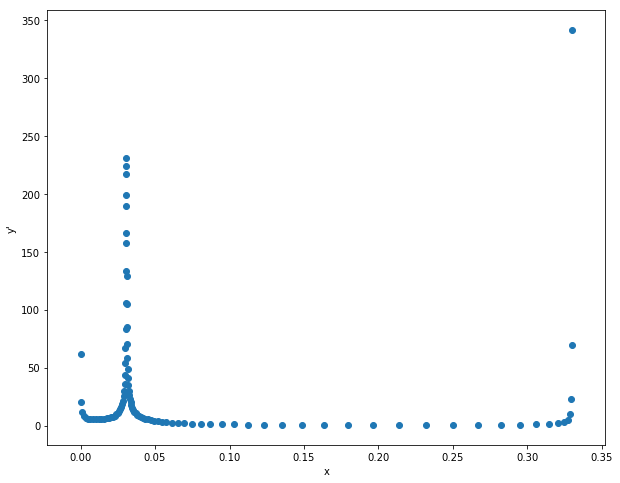

Product Type        Speaker
Category        Box Content
Sub Category            Box
Name: 184, dtype: object
2378    0.02
2379    0.03
2380    0.04
2381    0.05
2382    0.06
2383    0.07
2384    0.08
2385    0.09
2386    0.10
2387    0.14
2388    0.15
2389    0.17
2390    0.20
2391    0.23
2392    0.27
2393    0.30
2394    0.31
2395    0.39
2396    0.45
2397    0.70
2398    0.71
2399    0.74
2400    0.78
2401    0.81
2402    0.93
2403    0.99
2404    1.01
2405    1.17
2406    1.21
2407    1.22
2408    1.25
2409    1.38
2410    2.88
2411    3.06
2412    3.13
Name: Qty x ASP, dtype: float64
5
f6


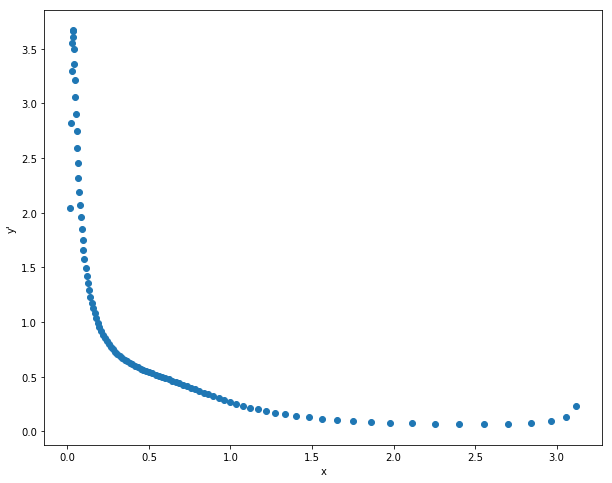

Product Type        Speaker
Category        Box Content
Sub Category        Charger
Name: 185, dtype: object
0    1.95
1    2.19
2    2.43
3    2.55
4    2.73
5    2.92
6    3.06
7    3.57
8    3.77
Name: Qty x ASP, dtype: float64
3
f4


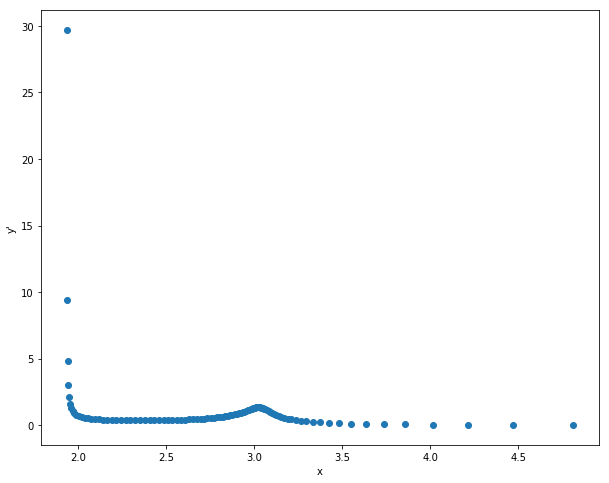

Product Type        Speaker
Category        Box Content
Sub Category           Cord
Name: 186, dtype: object
0    0.01
1    1.01
2    1.40
Name: Qty x ASP, dtype: float64
3
f4


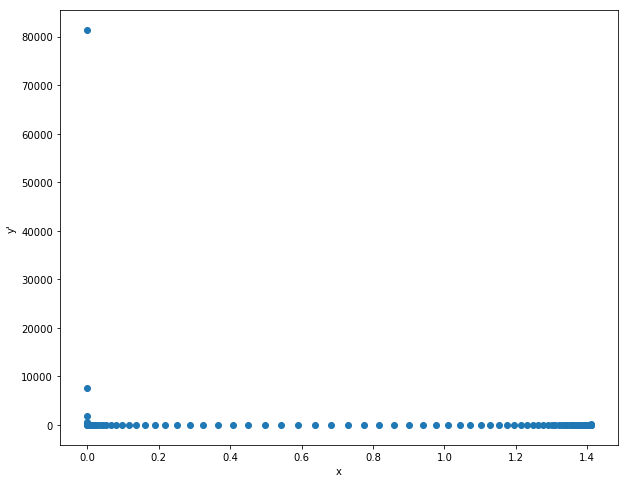

Product Type        Speaker
Category        Box Content
Sub Category      Desiccant
Name: 187, dtype: object
0    0.01
1    0.02
2    0.03
3    0.04
Name: Qty x ASP, dtype: float64
4
f5


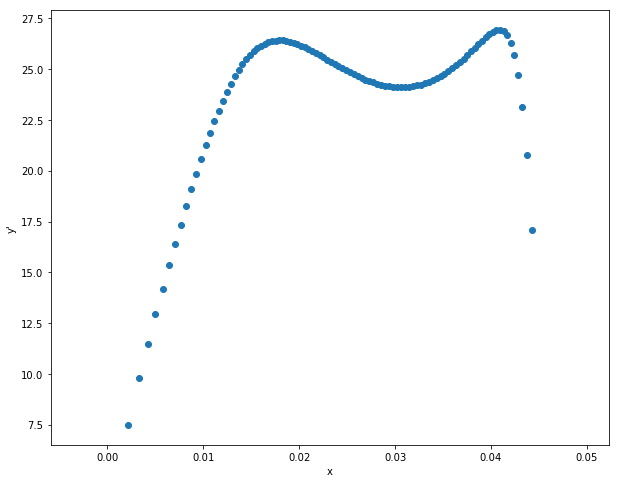

Product Type           Speaker
Category           Box Content
Sub Category    Ethernet cable
Name: 188, dtype: object
0    1.210
1    1.665
2    2.120
Name: Qty x ASP, dtype: float64
1
f2


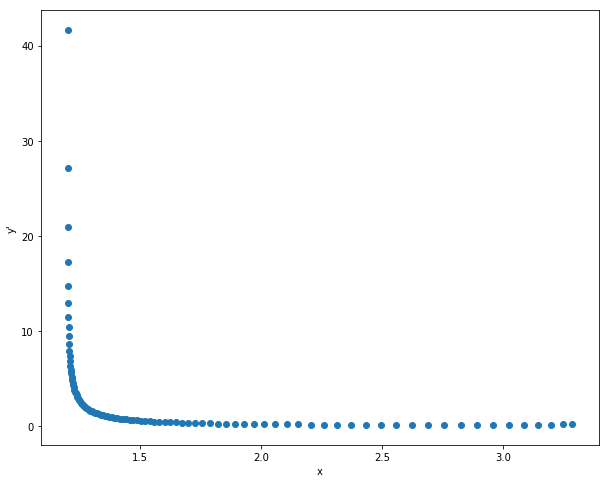

Product Type        Speaker
Category        Box Content
Sub Category        Housing
Name: 189, dtype: object
2422    0.01
2423    0.02
2424    0.03
2425    0.04
2426    0.05
2427    0.06
2428    0.07
2429    0.16
2430    0.36
2431    1.04
2432    4.70
Name: Qty x ASP, dtype: float64
1
f2


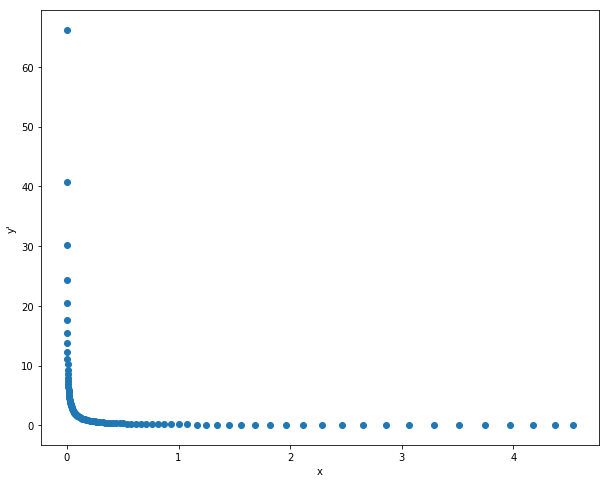

Product Type        Speaker
Category        Box Content
Sub Category         Insert
Name: 190, dtype: object
2433    0.01
2434    0.02
2435    0.03
2436    0.04
2437    0.05
2438    0.06
2439    0.07
2440    0.10
2441    0.11
2442    0.12
2443    0.13
2444    0.14
2445    0.15
2446    0.19
2447    0.31
2448    0.32
2449    0.50
Name: Qty x ASP, dtype: float64
7
f8


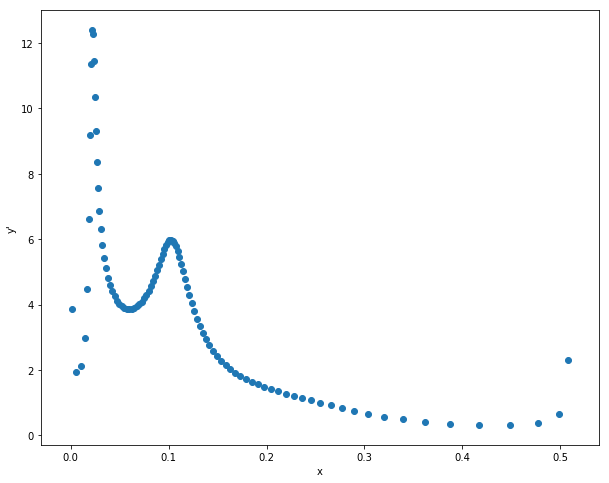

Product Type        Speaker
Category        Box Content
Sub Category         Manual
Name: 191, dtype: object
2450    0.01
2451    0.02
2452    0.03
2453    0.05
2454    0.06
2455    0.07
2456    0.08
2457    0.09
2458    0.10
2459    0.11
2460    0.13
2461    0.23
2462    0.28
2463    0.42
2464    0.64
2465    1.08
2466    1.15
2467    1.69
2468    1.96
2469    7.01
Name: Qty x ASP, dtype: float64
5
f6


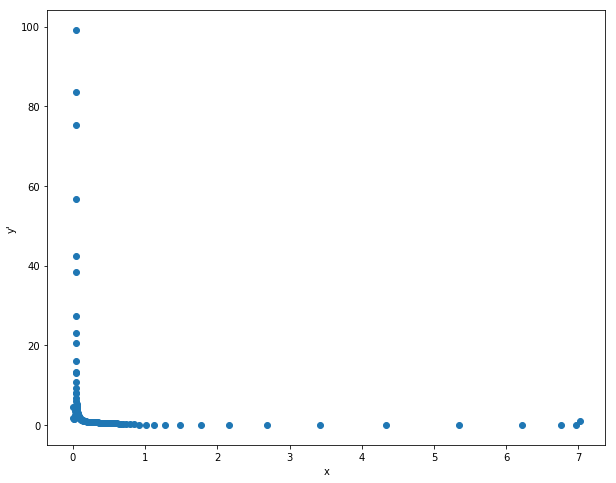

Product Type             Speaker
Category             Box Content
Sub Category    Packing material
Name: 192, dtype: object
2470    0.01
2471    0.02
2472    0.03
2473    0.05
2474    0.06
2475    0.07
2476    0.11
2477    0.12
2478    0.16
2479    0.17
2480    0.21
2481    0.33
2482    0.34
Name: Qty x ASP, dtype: float64
4
f5


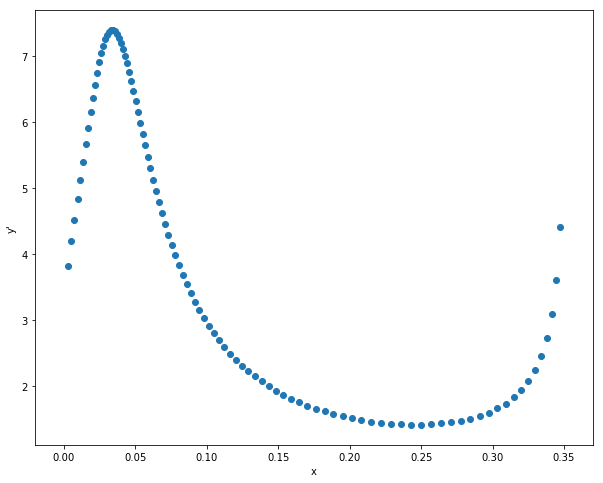

Product Type         Speaker
Category         Box Content
Sub Category    Power Supply
Name: 193, dtype: object
0    4.35
1    4.95
2    5.15
3    5.85
4    6.45
5    7.02
Name: Qty x ASP, dtype: float64
1
f2


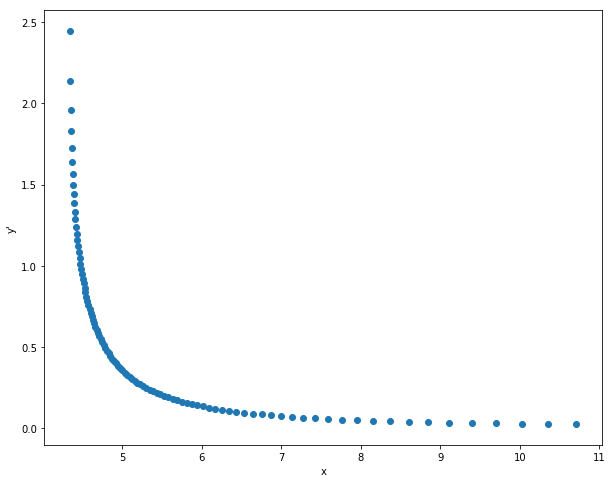

Product Type        Speaker
Category        Box Content
Sub Category     Power cord
Name: 194, dtype: object
2485    0.29
2486    0.36
2487    0.37
2488    0.45
2489    1.08
2490    1.14
2491    1.15
Name: Qty x ASP, dtype: float64
2
f3


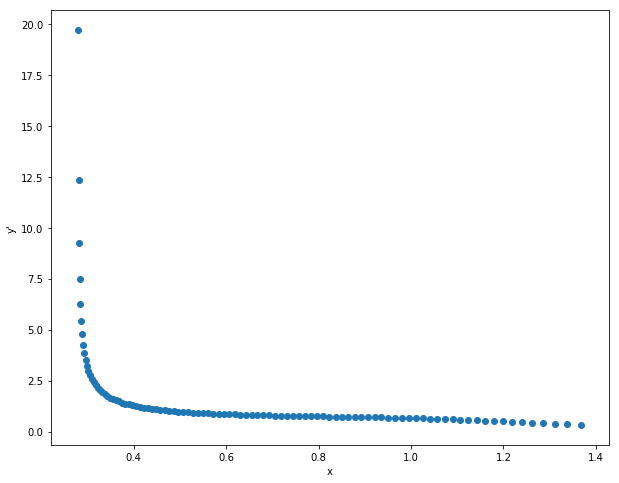

Product Type          Speaker
Category          Box Content
Sub Category    Sim card tool
Name: 195, dtype: object
0    0.020
1    0.021
2    0.050
Name: Qty x ASP, dtype: float64
1
f2


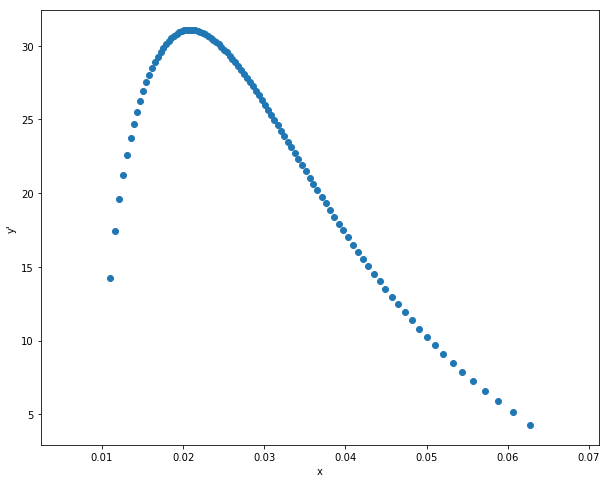

Product Type        Speaker
Category        Box Content
Sub Category          Strap
Name: 196, dtype: object
0    0.46
1    1.56
2    2.18
Name: Qty x ASP, dtype: float64
1
f2


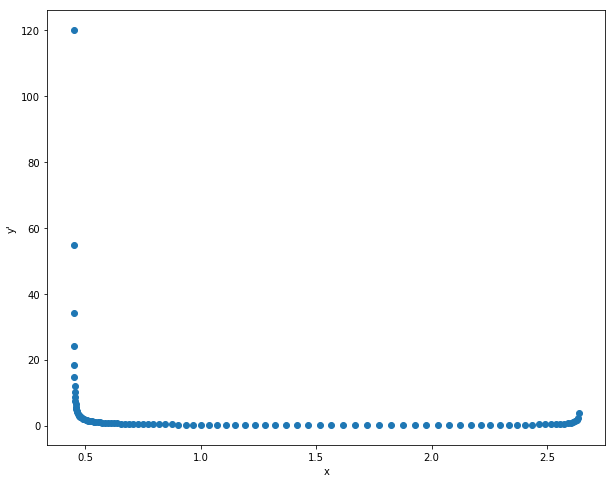

Product Type        Speaker
Category        Box Content
Sub Category      USB cable
Name: 197, dtype: object
2497    0.47
2498    0.53
2499    0.60
2500    0.64
2501    0.71
2502    0.99
Name: Qty x ASP, dtype: float64
5
f6


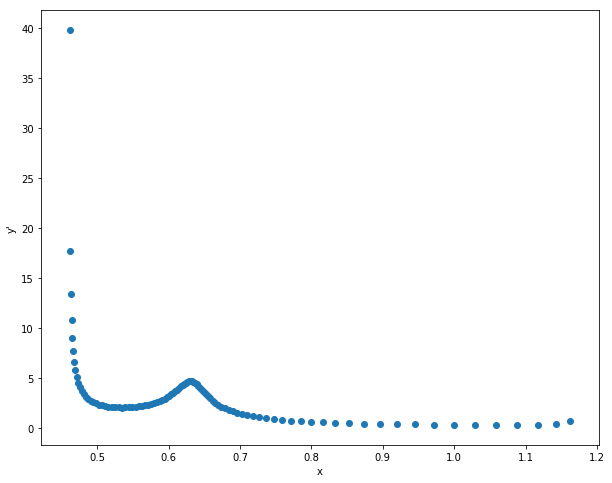

Product Type        Speaker
Category        Box Content
Sub Category         insert
Name: 198, dtype: object
2503    0.01
2504    0.05
2505    0.08
2506    0.09
2507    0.46
2508    0.69
Name: Qty x ASP, dtype: float64
3
f4


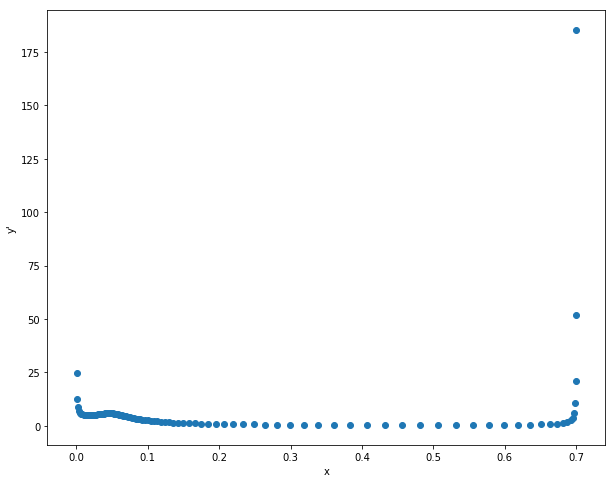

Product Type          Speaker
Category          Box Content
Sub Category    interconnects
Name: 199, dtype: object
2509    0.17
2510    0.39
2511    0.42
2512    0.47
2513    0.48
2514    0.50
Name: Qty x ASP, dtype: float64
1
f2


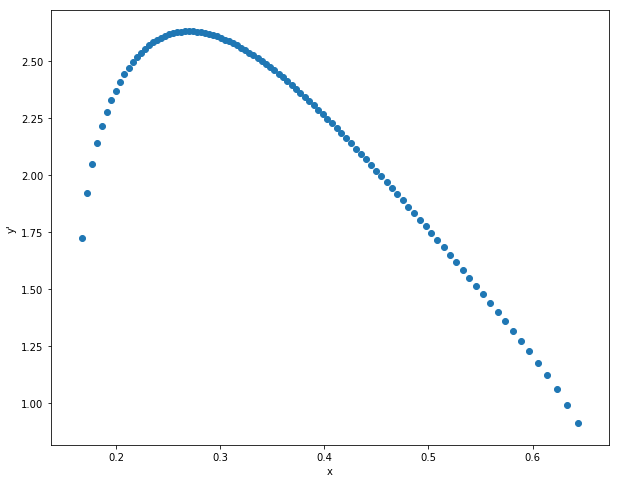

Product Type       Speaker
Category        Electrical
Sub Category     Acoustics
Name: 200, dtype: object
2515     0.05
2516     0.18
2517     0.19
2518     0.93
2519     1.10
2520     1.27
2521     1.38
2522     1.40
2523     1.47
2524     1.53
2525     1.72
2526     1.80
2527     1.80
2528     1.96
2529     2.41
2530     2.48
2531     3.63
2532     6.99
2533     7.70
2534    30.59
Name: Qty x ASP, dtype: float64
2
f3


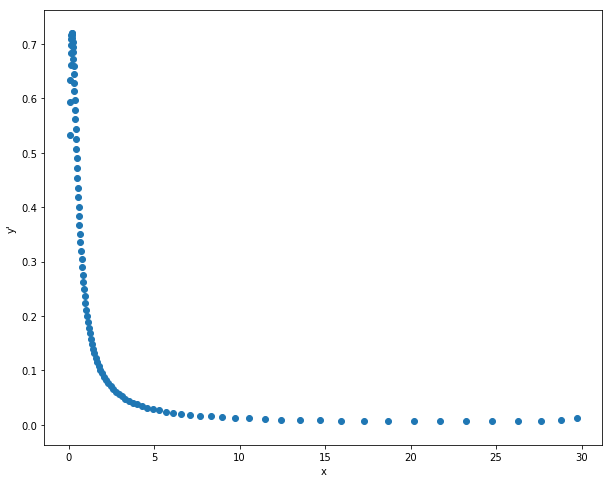

Product Type       Speaker
Category        Electrical
Sub Category       Battery
Name: 201, dtype: object
2535     1.05
2536     2.03
2537     3.41
2538     4.07
2539     4.52
2540     4.81
2541     5.50
2542     7.18
2543     8.34
2544     9.05
2545    13.66
Name: Qty x ASP, dtype: float64
8
f9


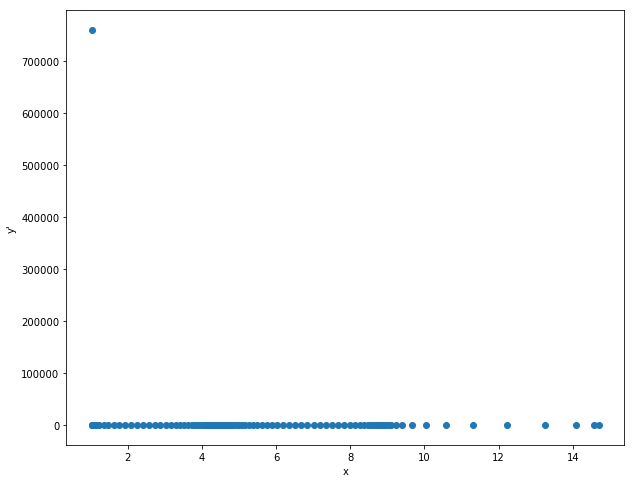

Product Type       Speaker
Category        Electrical
Sub Category       Display
Name: 202, dtype: object
0     0.29
1     0.54
2     8.78
3     9.32
4    15.36
5    18.03
6    28.38
7    46.37
Name: Qty x ASP, dtype: float64
4
f5


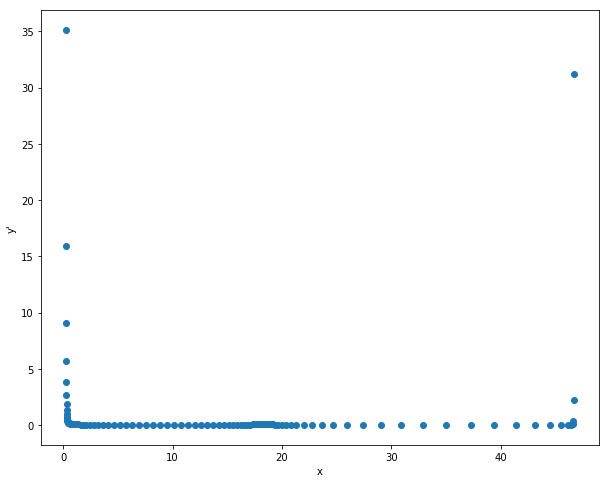

Product Type                       Speaker
Category                     Main PC Board
Sub Category    Audio and Power Management
Name: 203, dtype: object
2548    0.0003
2549    0.0006
2550    0.0011
2551    0.0016
2552    0.0018
2553    0.0020
2554    0.0022
2555    0.0026
2556    0.0028
2557    0.0031
2558    0.0034
2559    0.0036
2560    0.0038
2561    0.0040
2562    0.0042
2563    0.0044
2564    0.0045
2565    0.0045
2566    0.0050
2567    0.0055
2568    0.0056
2569    0.0058
2570    0.0059
2571    0.0060
2572    0.0061
2573    0.0062
2574    0.0062
2575    0.0067
2576    0.0068
2577    0.0072
         ...  
2911    0.5945
2912    0.6042
2913    0.6432
2914    0.6608
2915    0.6678
2916    0.6788
2917    0.6850
2918    0.6952
2919    0.7068
2920    0.7776
2921    0.7827
2922    0.8233
2923    0.9327
2924    1.0000
2925    1.1080
2926    1.1250
2927    1.1826
2928    1.2147
2929    1.3695
2930    1.4000
2931    1.4878
2932    1.5241
2933    1.6925
2934    1.8905
2935    2.0026
2936  

AttributeError: 'NoneType' object has no attribute 'replace'

In [69]:
x_list=df3.groupby(['Product Type','Category','Sub Category']).size().reset_index()
x_list=x_list[['Product Type','Category','Sub Category']]
x_list=x_list[x_list['Product Type']=='Speaker']
for i in x_list.index:
        print(x_list.ix[i])
        temp=df3[(df3['Product Type'] == x_list.ix[i,0]) & (df3['Category'] == x_list.ix[i,1]) & (df3['Sub Category'] == x_list.ix[i,2])]
        temp=temp['Qty x ASP']
        print(temp)
#        x=pd.DataFrame(temp['Qty x ASP'],columns=['x'])
        
        df_=qf(x=temp.sort_values(), ys=99, bound=2, 
               lower_bound=max(0,temp.values.min()-0.01), 
               upper_bound=temp.values.max()+temp.values.min())
        plt.figure(figsize=(10,8))
        plt.scatter(df_['cdf'].values,df_['pdf'].values,)
        plt.xlabel('x')
        plt.ylabel("y'")
        plt.show()


In [50]:
df_

,y,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,f4,f5,f6,f7,f8,f9,f10,cdf,pdf,prob
0,0.01,-7.232399,-3.399606,-8.639355,-1.552708,-2.300449,2.472570,-8.334135,-28.220027,-1878.218541,...,0.003630,-0.008444,-0.014928,-0.003303,0.007843,0.001863,0.000025,1.831099e-13,1.017248e+10,5.530817e-07
1,0.02,-6.323322,-3.299262,-6.780683,-2.352845,-2.770431,0.409141,-7.493847,-24.634961,-1605.664193,...,0.007715,-0.018075,-0.029641,-0.006888,0.017448,0.004052,0.000051,6.602162e-12,6.136770e+08,3.336585e-08
2,0.03,-5.785965,-3.255972,-5.758208,-2.780439,-3.036272,-0.738616,-7.044485,-22.704136,-1448.785906,...,0.012282,-0.030288,-0.047837,-0.010939,0.027967,0.006555,0.000078,4.552320e-11,1.439956e+08,7.829093e-09
3,0.04,-5.400715,-3.233115,-5.074992,-3.047153,-3.206697,-1.502964,-6.741558,-21.427662,-1337.999270,...,0.017379,-0.046790,-0.072696,-0.015625,0.038573,0.009307,0.000104,1.631543e-10,5.704283e+07,3.101440e-09
4,0.05,-5.098747,-3.219834,-4.575913,-3.222340,-3.319525,-2.053397,-6.511374,-20.491281,-1251.744639,...,0.023067,-0.070564,-0.109871,-0.021147,0.048541,0.012193,0.000129,4.161633e-10,2.929833e+07,1.592961e-09
5,0.06,-4.849402,-3.211552,-4.192132,-3.338161,-3.393187,-2.466553,-6.322483,-19.755264,-1180.545368,...,0.029421,-0.107773,-0.172327,-0.027772,0.057368,0.015067,0.000153,8.687837e-10,1.734237e+07,9.429111e-10
6,0.07,-4.636324,-3.205961,-3.887061,-3.412426,-3.438345,-2.783914,-6.158897,-19.145615,-1119.423618,...,0.036527,-0.173820,-0.299369,-0.035878,0.064803,0.017774,0.000175,1.598377e-09,1.111974e+07,6.045847e-10
7,0.08,-4.449749,-3.201763,-3.638934,-3.456148,-3.461852,-3.030597,-6.011582,-18.618758,-1065.459966,...,0.044490,-0.321397,-0.695190,-0.046014,0.070818,0.020179,0.000196,2.707011e-09,7.454385e+06,4.052977e-10
8,0.09,-4.283377,-3.198167,-3.433757,-3.476672,-3.468438,-3.223037,-5.875064,-18.147171,-1016.808306,...,0.053434,-0.927287,15.509249,-0.059025,0.075530,0.022193,0.000215,4.338080e-09,5.115813e+06,2.781487e-10
9,0.10,-4.132906,-3.194669,-3.262006,-3.479174,-3.461548,-3.372614,-5.745865,-17.712608,-972.235554,...,0.063505,1.940477,0.786994,-0.076284,0.079130,0.023777,0.000233,6.699244e-09,3.549135e+06,1.929678e-10


f9


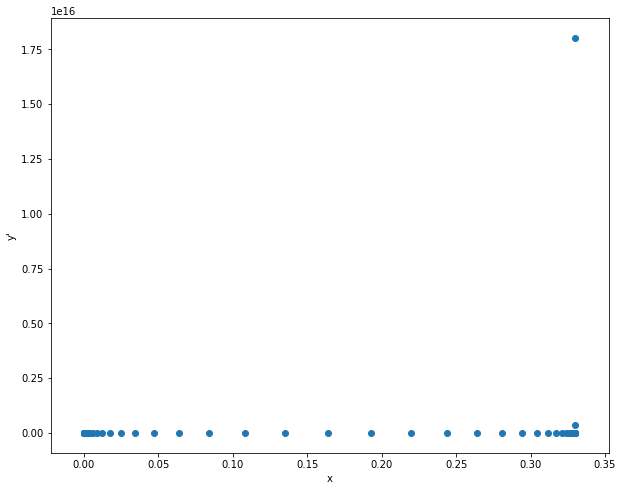

In [41]:
x=x=[0.01,
0.02,
0.04,
0.05,
0.07,
0.32,
]

x=pd.DataFrame(x,columns=['x'])

#  u = unbounded -> 0
#  s = semibounded -> 1 
#  b = bounded -> 2

dff=qf(x=x['x'].sort_values(), ys=99, bound=2, lower_bound=max(0,x.x.min()-0.01), upper_bound=x.x.max()+x.x.min())
plt.figure(figsize=(10,8))
plt.scatter(dff['cdf'].values,dff['pdf'].values,)
plt.xlabel('x')
plt.ylabel("y'")
plt.show()

In [45]:
    bound=2
    lower_bound=max(0,x.x.min()-0.01)
    upper_bound=x.x.max()+x.x.min()
    df=pd.DataFrame(x.values,columns=['x'])
    df['y']=(df.index+1-.5)/len(x)

    if bound==0:
        df['z']=df['x']
    if bound==1:
        df['z']=np.log(df['x']-lower_bound)
    if bound==2:
        df['z']=np.log((df['x']-lower_bound)/(upper_bound-df['x']))

    df['y10_0']=1
    df['y10_1']=np.log(df['y']/(1-df['y']))   #np.log(B20/(1-B20))
    df['y10_2']=(df['y']-0.5)*df['y10_1']   #(B20-0.5)*BE79
    df['y10_3']=df['y']-0.5                #B20-0.5
    df['y10_4']=df['y10_3']**2            #BG79^2
    df['y10_5']=df['y10_1']*df['y10_4']   #BE79*BH79
    df['y10_6']=df['y10_3']**3            #BG79^3
    df['y10_7']=df['y10_1']*df['y10_6']   #BE79*BJ79
    df['y10_8']=df['y10_3']**4            #BG79^4
    df['y10_9']=df['y10_1']*df['y10_8']   #BE79*BL79

    
    #matrix inversion
    
    mi1=np.dot(df['z'].values,np.matrix(df[df.columns[3:5]]))*np.linalg.inv(np.matrix(df[df.columns[3:5]]).T*np.matrix(df[df.columns[3:5]]))
    mi2=np.dot(df['z'].values,np.matrix(df[df.columns[3:6]]))*np.linalg.inv(np.matrix(df[df.columns[3:6]]).T*np.matrix(df[df.columns[3:6]]))
    mi3=np.dot(df['z'].values,np.matrix(df[df.columns[3:7]]))*np.linalg.inv(np.matrix(df[df.columns[3:7]]).T*np.matrix(df[df.columns[3:7]]))
    mi4=np.dot(df['z'].values,np.matrix(df[df.columns[3:8]]))*np.linalg.inv(np.matrix(df[df.columns[3:8]]).T*np.matrix(df[df.columns[3:8]]))
    mi5=np.dot(df['z'].values,np.matrix(df[df.columns[3:9]]))*np.linalg.inv(np.matrix(df[df.columns[3:9]]).T*np.matrix(df[df.columns[3:9]]))
    mi6=np.dot(df['z'].values,np.matrix(df[df.columns[3:10]]))*np.linalg.inv(np.matrix(df[df.columns[3:10]]).T*np.matrix(df[df.columns[3:10]]))
    mi7=np.dot(df['z'].values,np.matrix(df[df.columns[3:11]]))*np.linalg.inv(np.matrix(df[df.columns[3:11]]).T*np.matrix(df[df.columns[3:11]]))
    mi8=np.dot(df['z'].values,np.matrix(df[df.columns[3:12]]))*np.linalg.inv(np.matrix(df[df.columns[3:12]]).T*np.matrix(df[df.columns[3:12]]))
    mi9=np.dot(df['z'].values,np.matrix(df[df.columns[3:13]]))*np.linalg.inv(np.matrix(df[df.columns[3:13]]).T*np.matrix(df[df.columns[3:13]]))


In [49]:
mi4

matrix([[ -1.8014182 ,   4.00191717,  10.27393904, -14.71416481,
         -48.74982281]])

In [ ]:
for i in range(0,21):
    print(np.random.choice(df['cdf'], 1, p=df['prob']))